# Road Accident Severity in India Analysis

## 1. Importing necessary libraires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## 2. Data Reading

In [2]:
ra = pd.read_csv("Road.csv")

#data cloning
df = ra.copy()

In [3]:
df.sample(4) 

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
3959,10:21:00,Monday,31-50,Male,NaN,Owner,NaN,Lorry (41?100Q),Owner,Unknown,No defect,Market areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,3,2,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
3101,17:30:00,Wednesday,31-50,Male,Elementary school,Other,5-10yr,NaN,NaN,2-5yrs,No defect,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2807,17:46:00,Wednesday,18-30,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,2-5yrs,NaN,Residential areas,One way,Steep grade downward with mountainous terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Rollover,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
7910,16:02:00,Monday,Over 51,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,NaN,Church areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Wet or damp,Daylight,Raining,Collision with roadside objects,1,3,Going straight,Driver or rider,Male,5,3,Other,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury


In [4]:
df.shape

(12316, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [7]:
df.isna().sum()*100/len(df)

Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        31.893472
Defect_of_vehicle              35.945112
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Casualty_class                  0.000000
Sex_of_casualty 

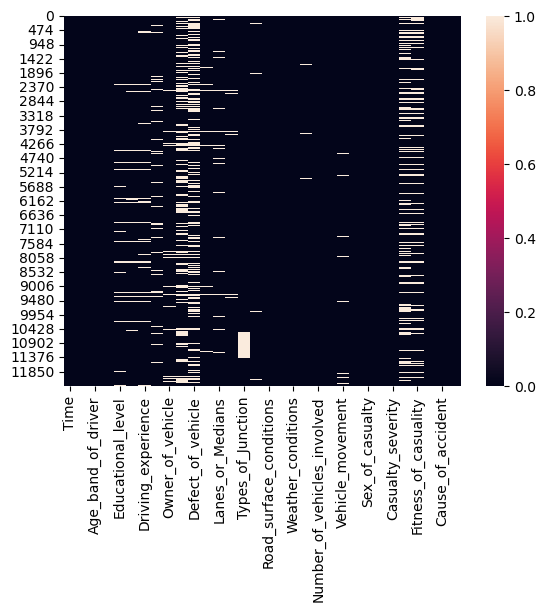

In [8]:
sns.heatmap(df.isna())
plt.show()

## 3. EDA

In [9]:
df[["Hour", "Minute", "Second"]] = df["Time"].str.split(":", expand=True)

In [10]:
df.head(2)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Minute,Second
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,02,00
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,02,00


In [11]:
df.Time = pd.to_datetime(df.Time)

C:\Users\SHIV-G\AppData\Local\Temp\ipykernel_5296\3099346244.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Time = pd.to_datetime(df.Time)


In [12]:
df = df.dropna(how="all")

In [13]:
df.shape

(12316, 35)

In [14]:
df.Time.min(), df.Time.max()

(Timestamp('2023-11-15 00:01:00'), Timestamp('2023-11-15 23:59:00'))

In [15]:
df.Time.sample(10)

8259    2023-11-15 13:13:00
9032    2023-11-15 08:20:00
653     2023-11-15 21:15:00
1175    2023-11-15 16:40:00
4476    2023-11-15 15:30:00
6880    2023-11-15 13:01:00
10915   2023-11-15 23:05:00
8039    2023-11-15 06:33:00
12189   2023-11-15 15:40:00
6968    2023-11-15 07:59:00
Name: Time, dtype: datetime64[ns]

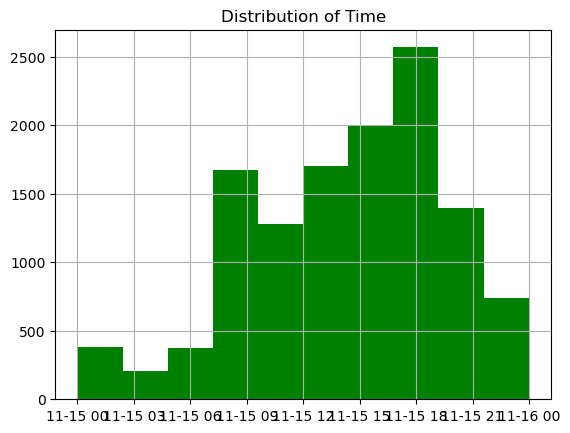

In [16]:
plt.title("Distribution of Time")
df.Time.hist(color="g")
plt.savefig("time_distribution.jpg")
plt.show()

In [17]:
cols = df.select_dtypes(exclude="int")
cols = cols.columns[1:]
cols

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour', 'Minute', 'Second'],
      dtype='object')

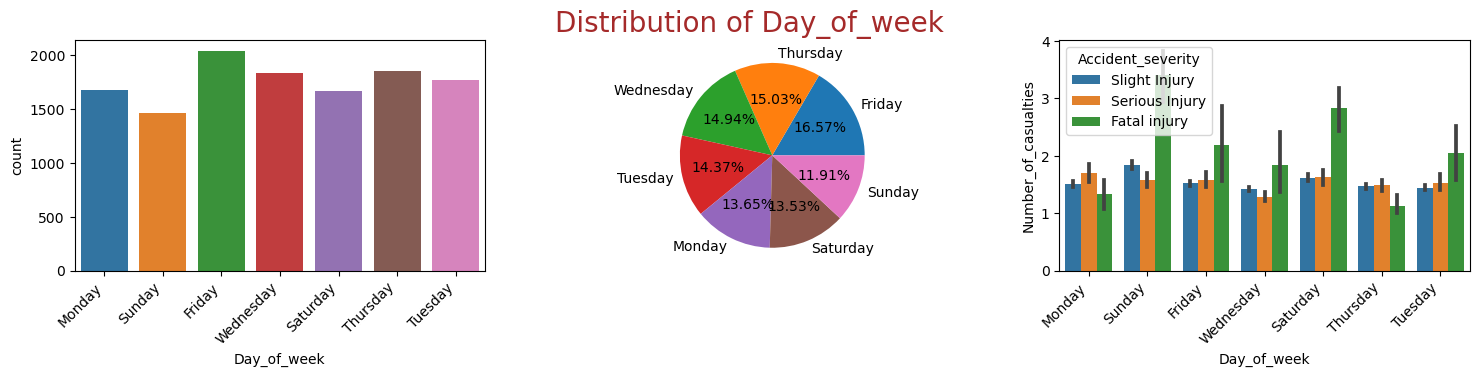

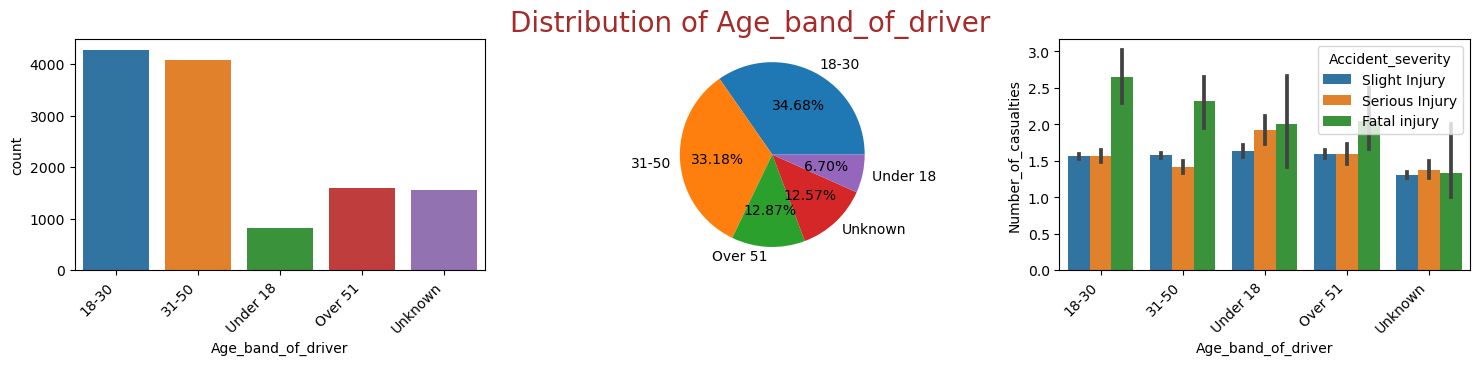

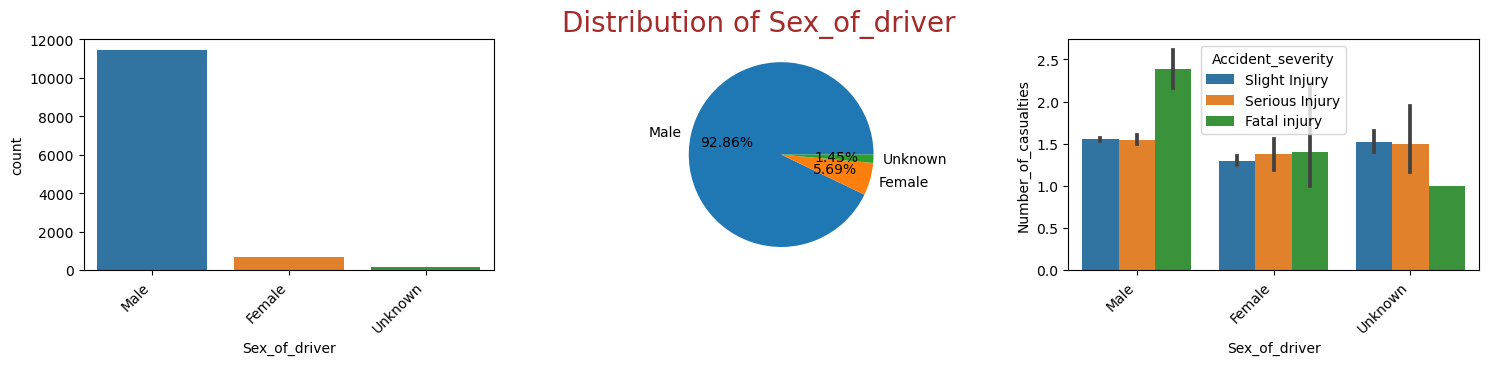

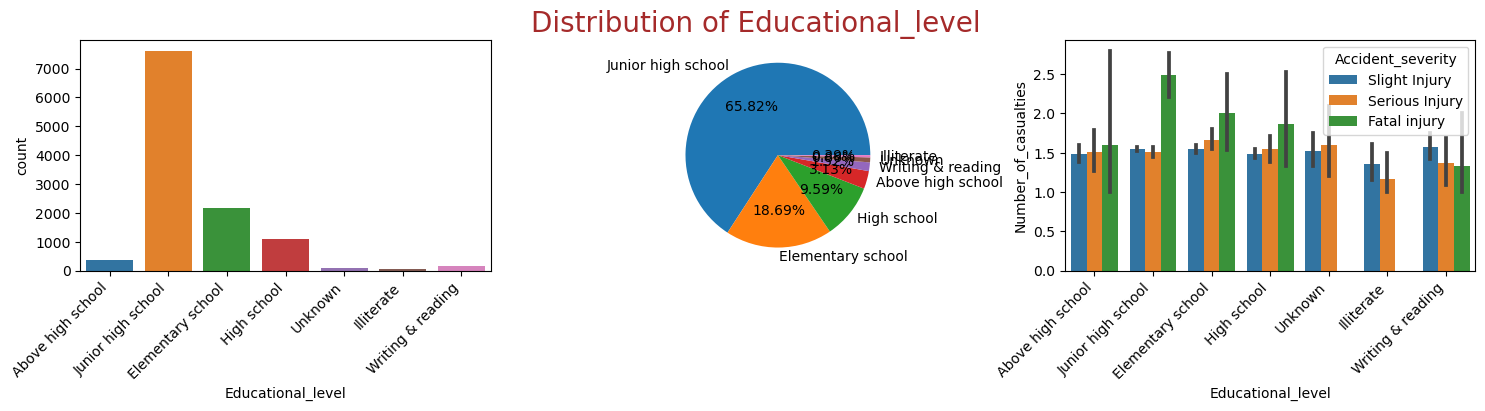

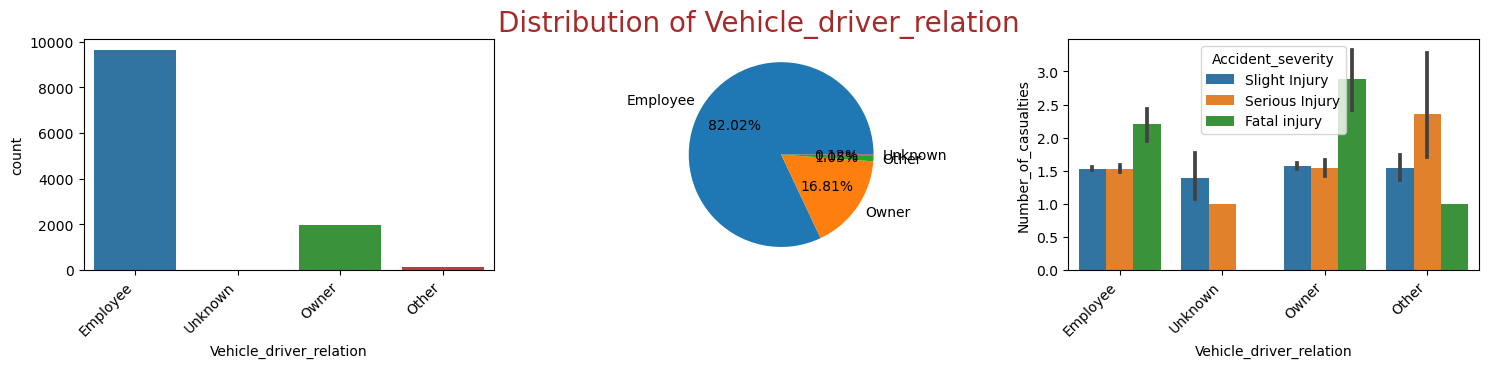

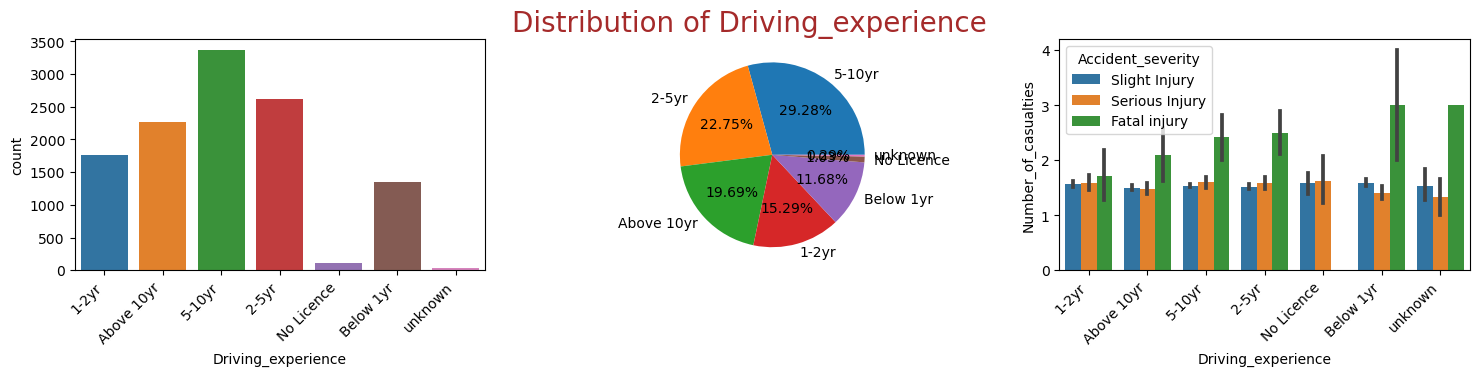

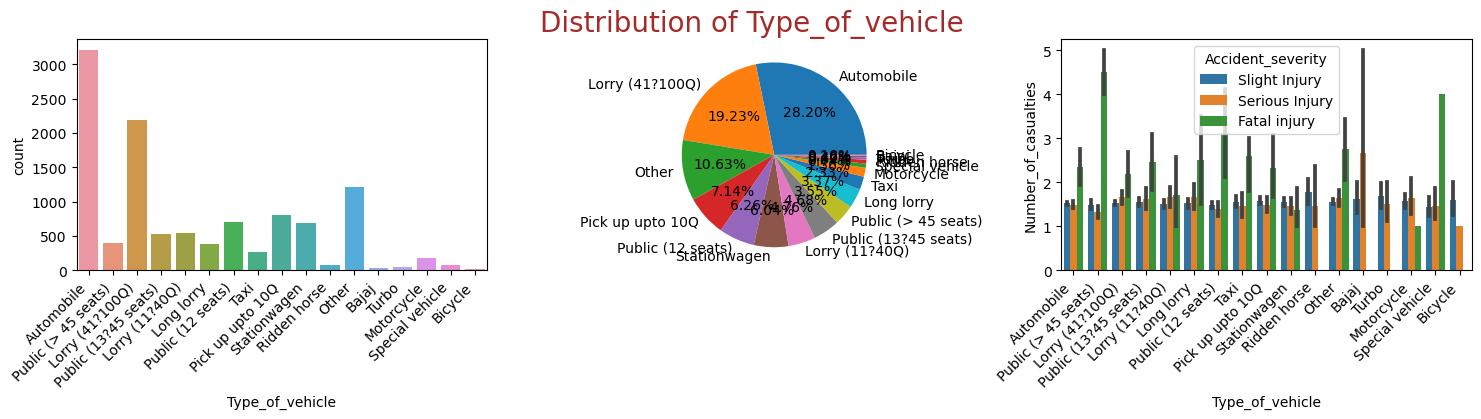

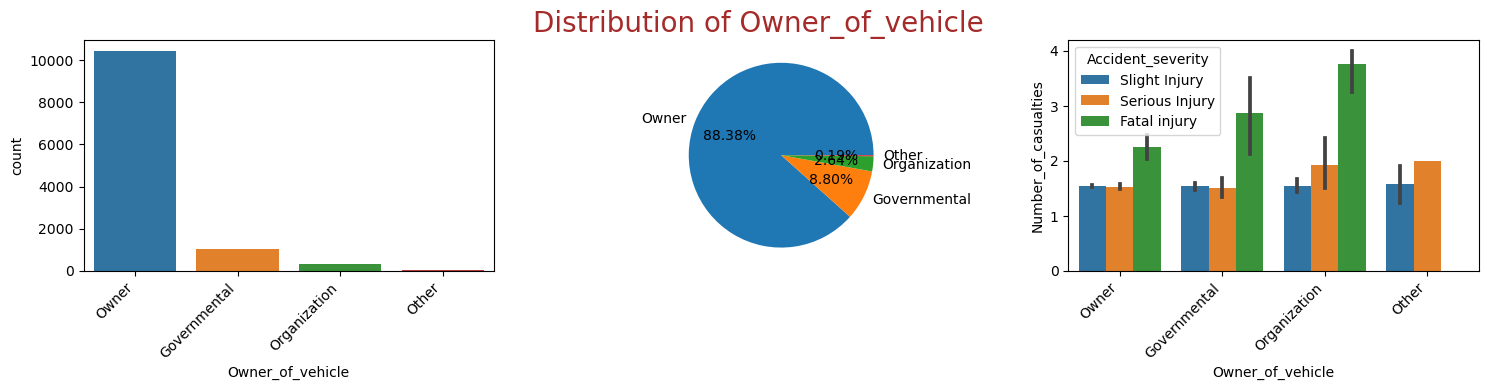

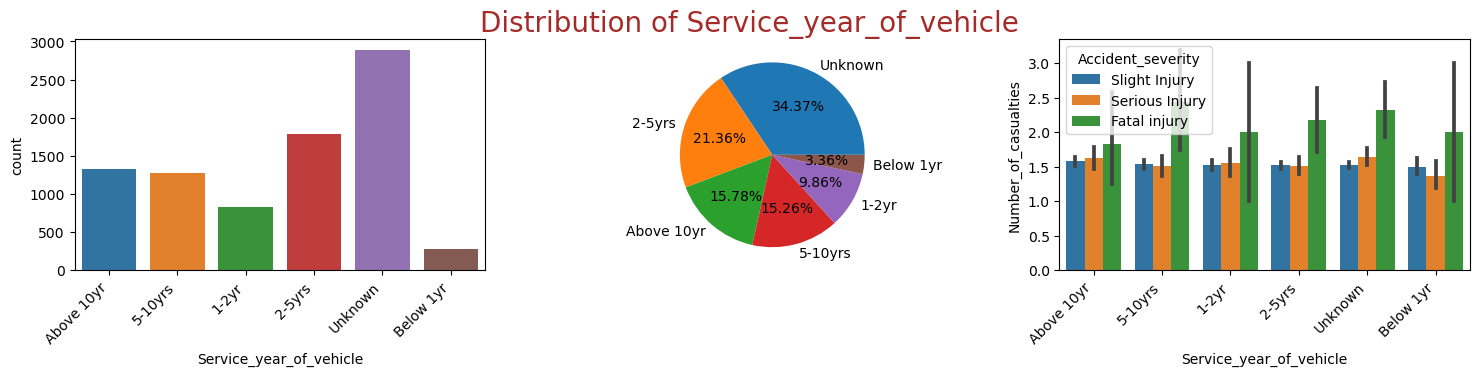

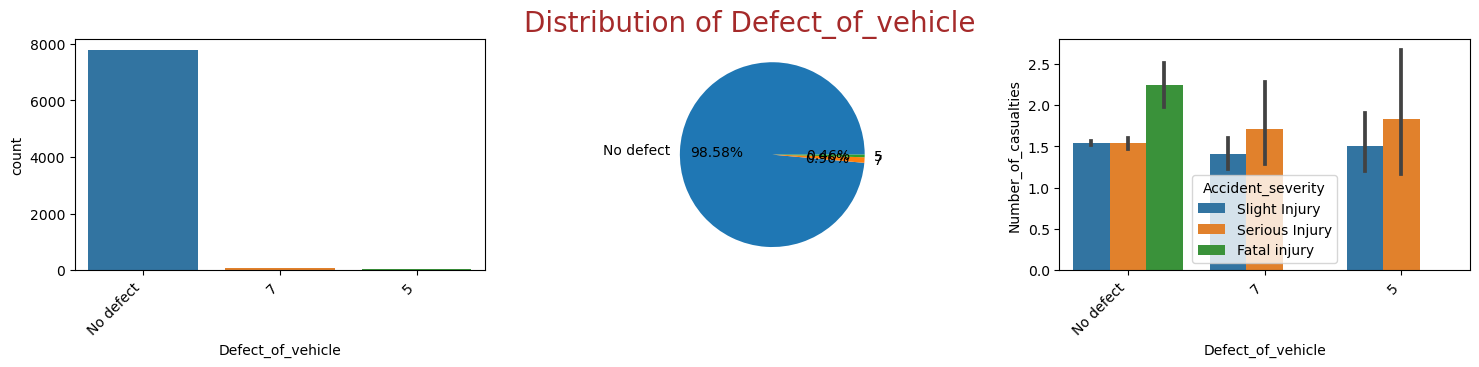

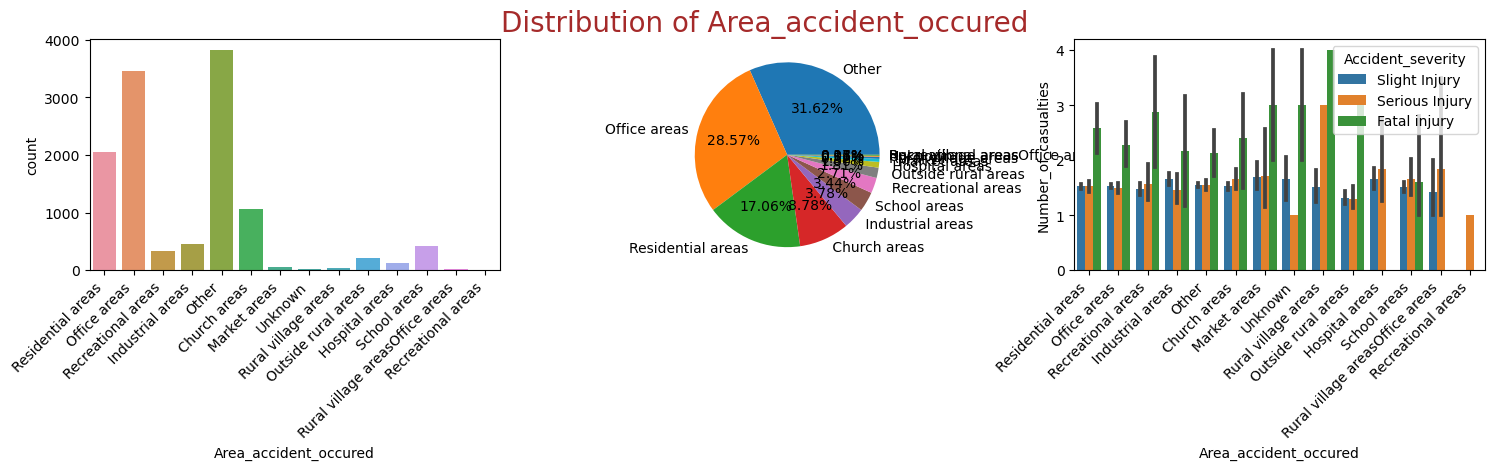

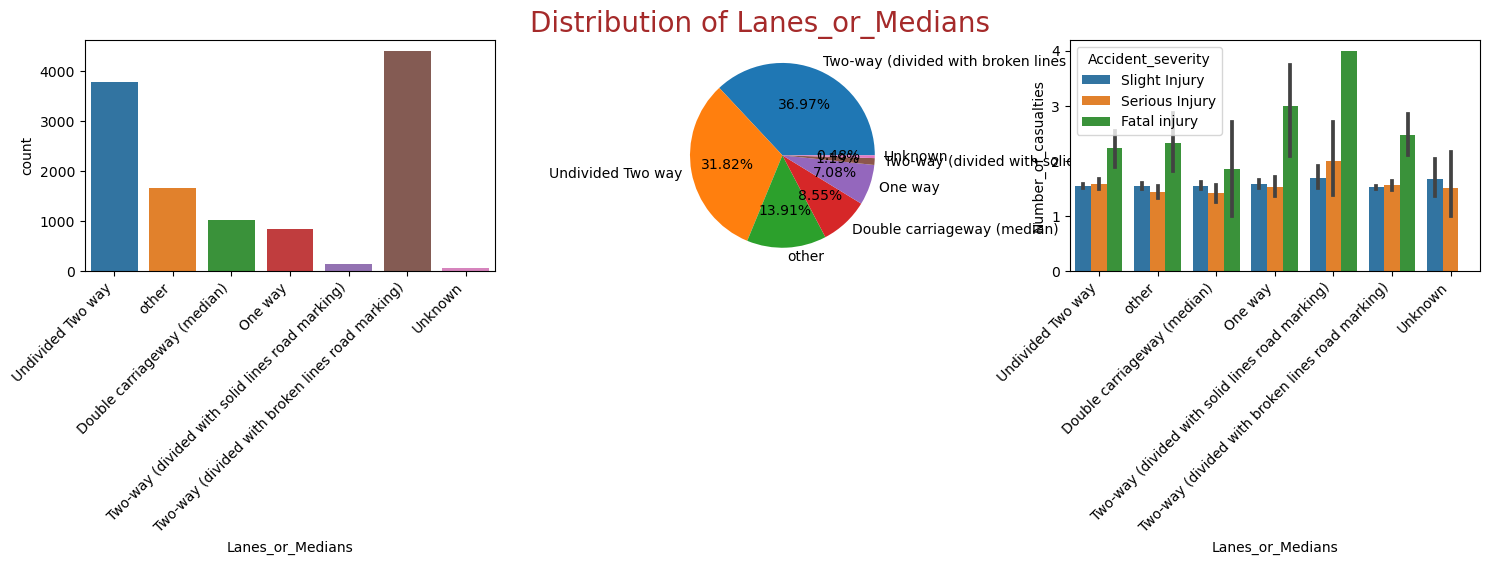

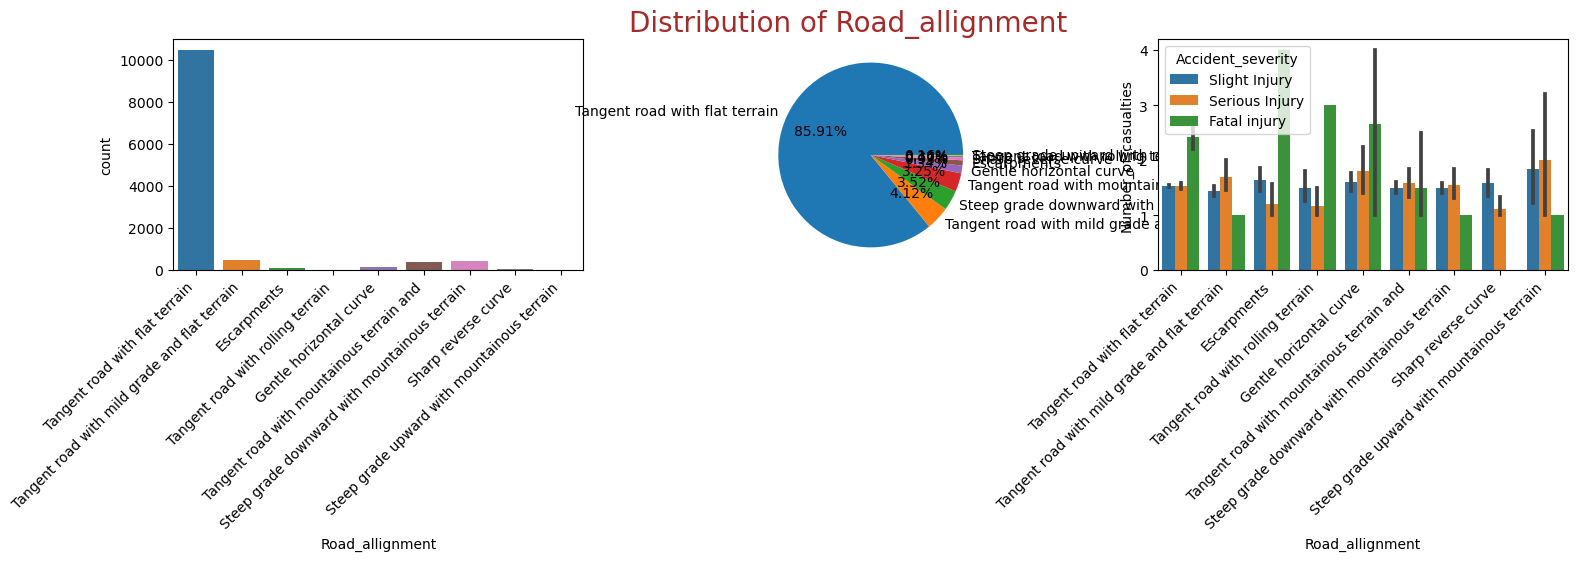

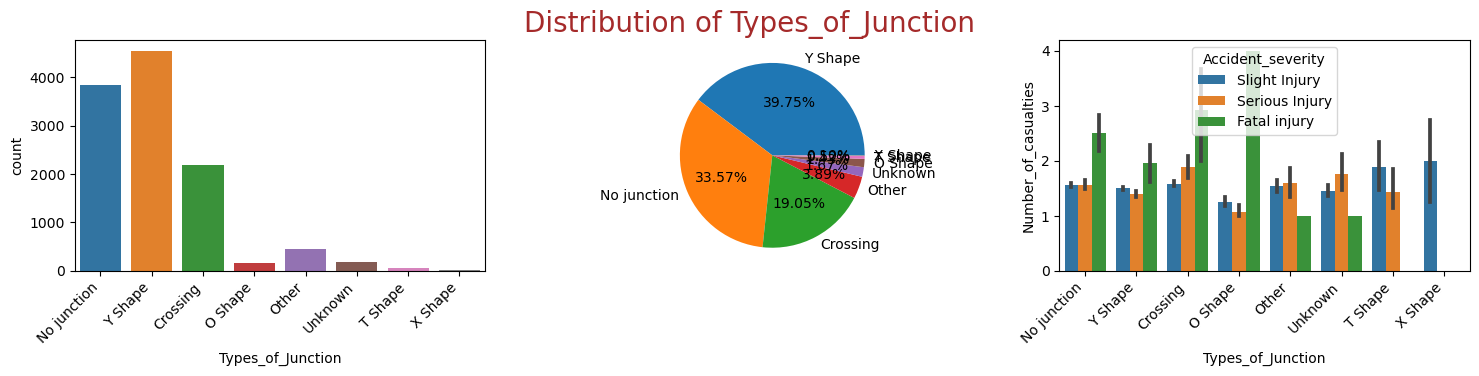

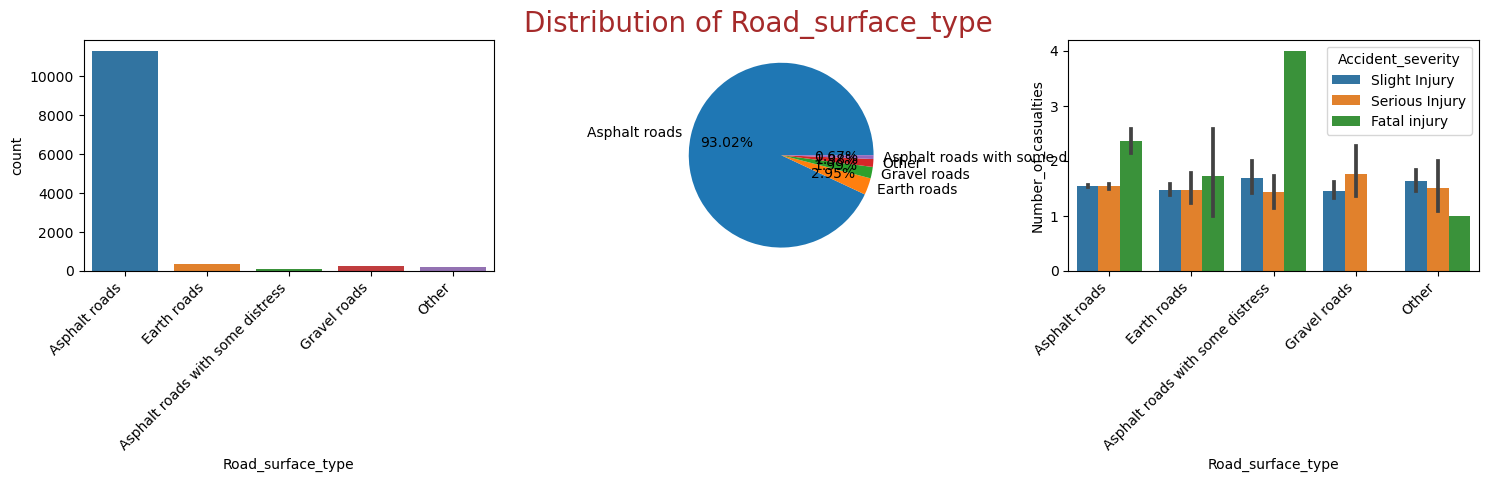

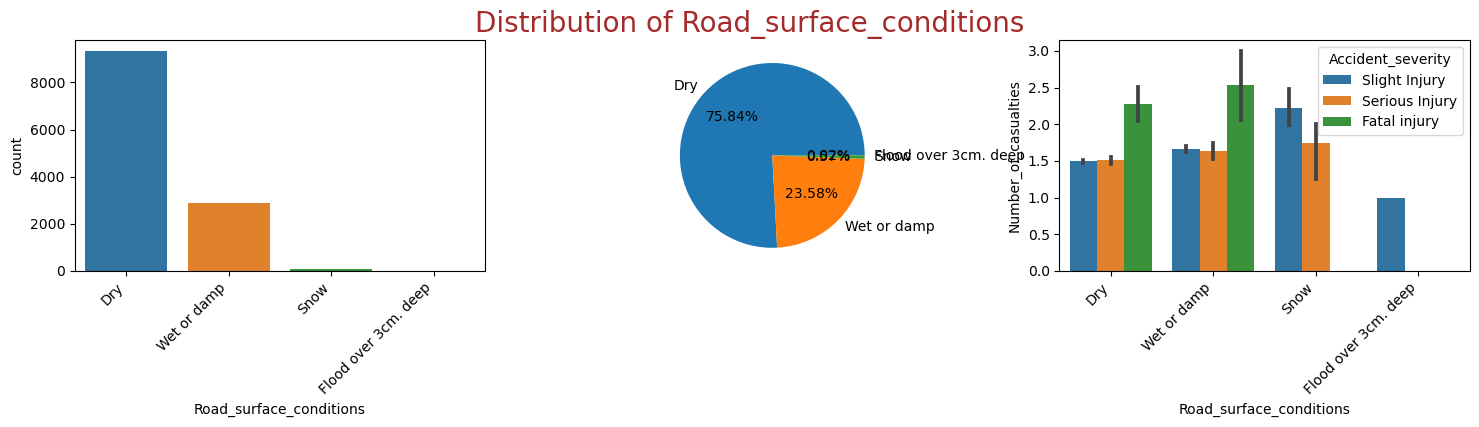

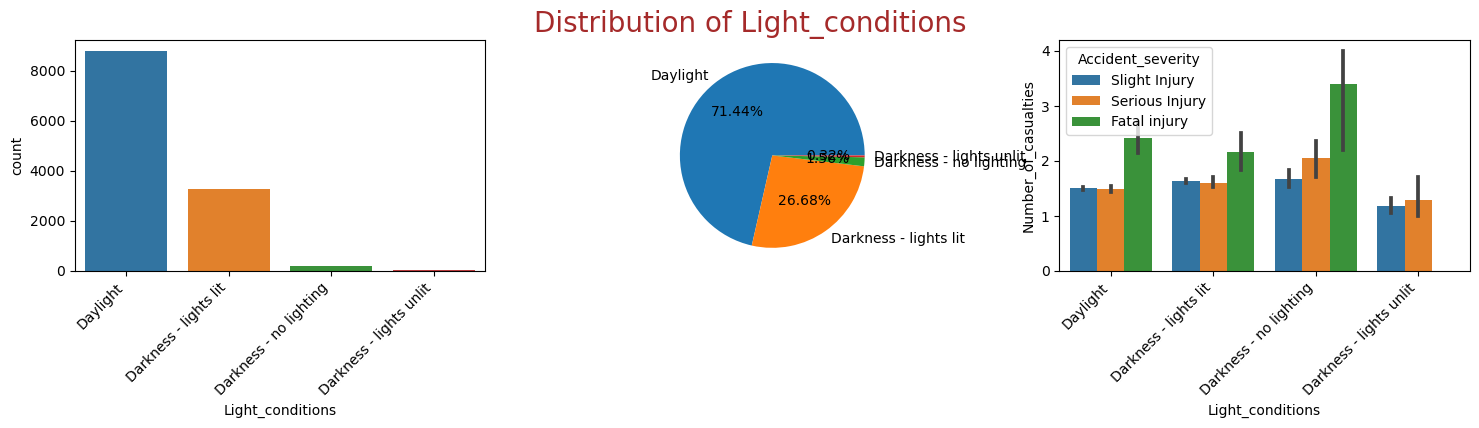

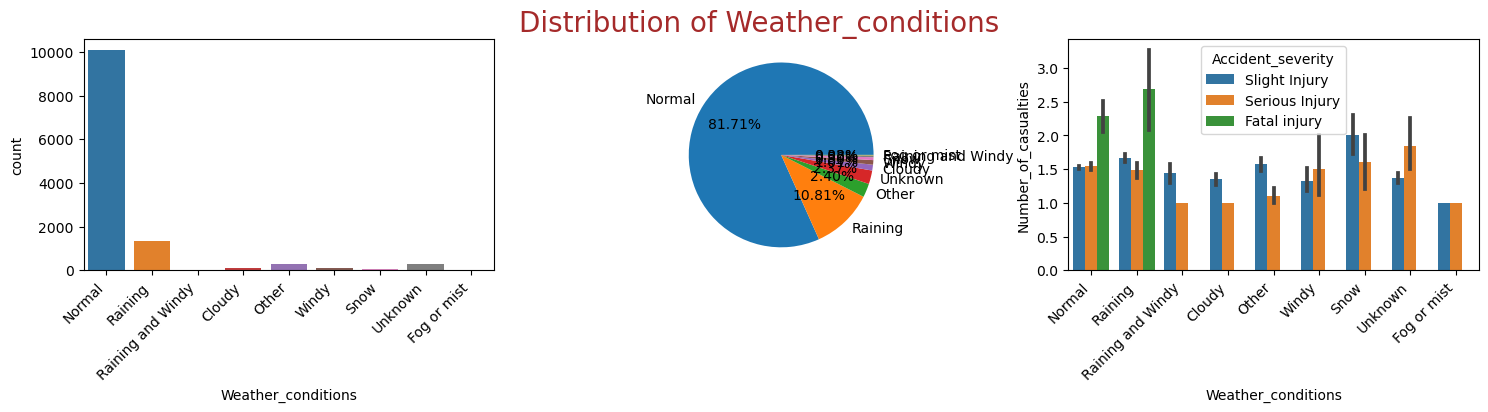

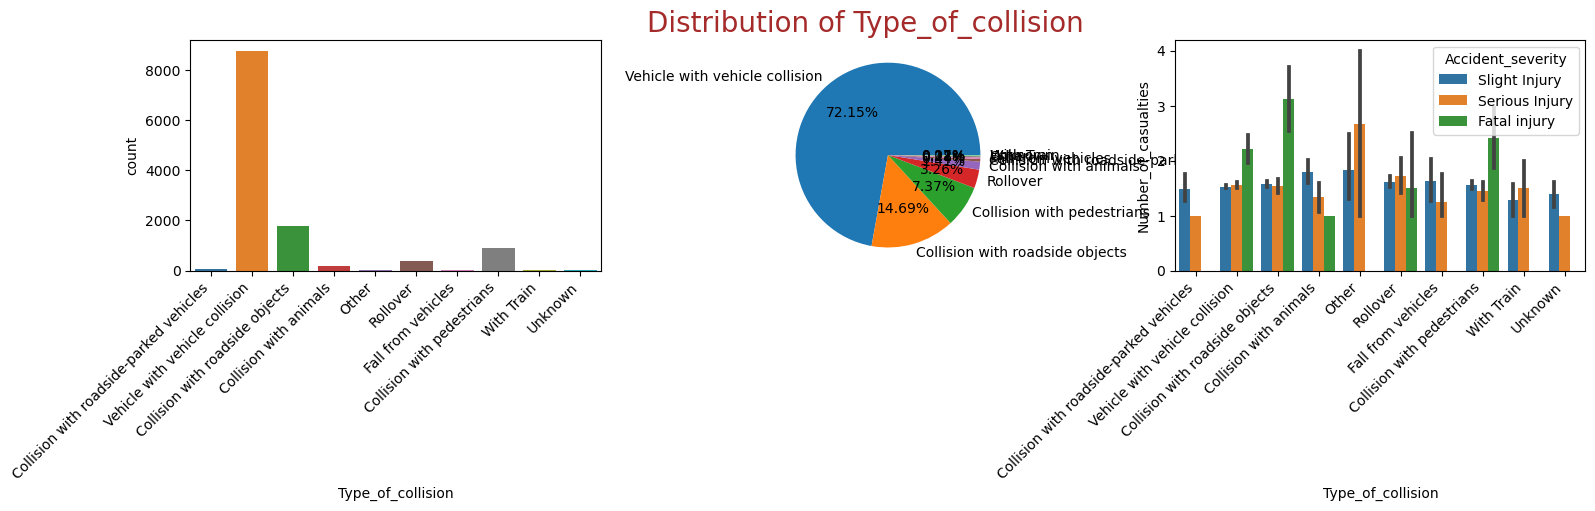

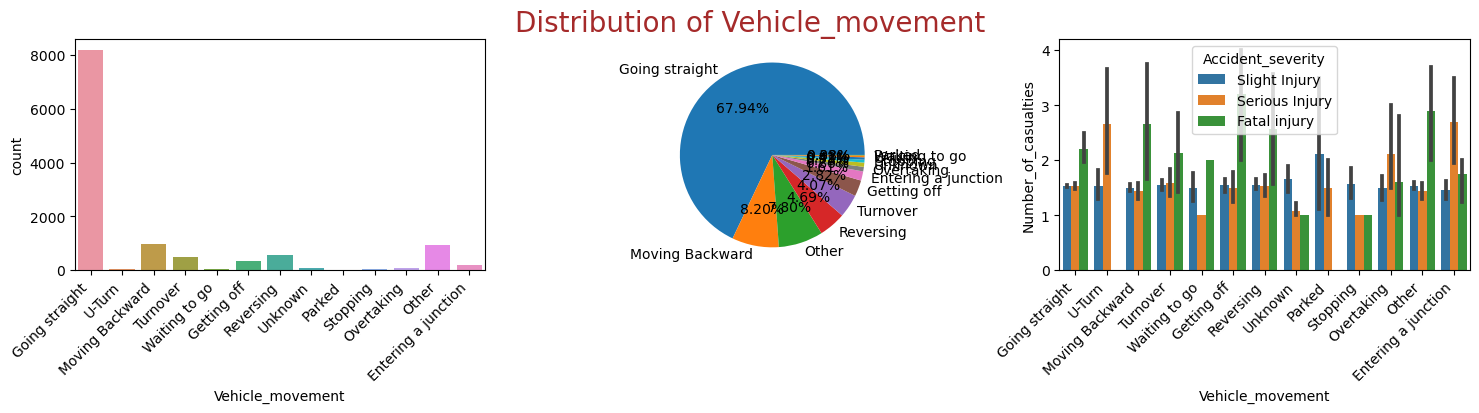

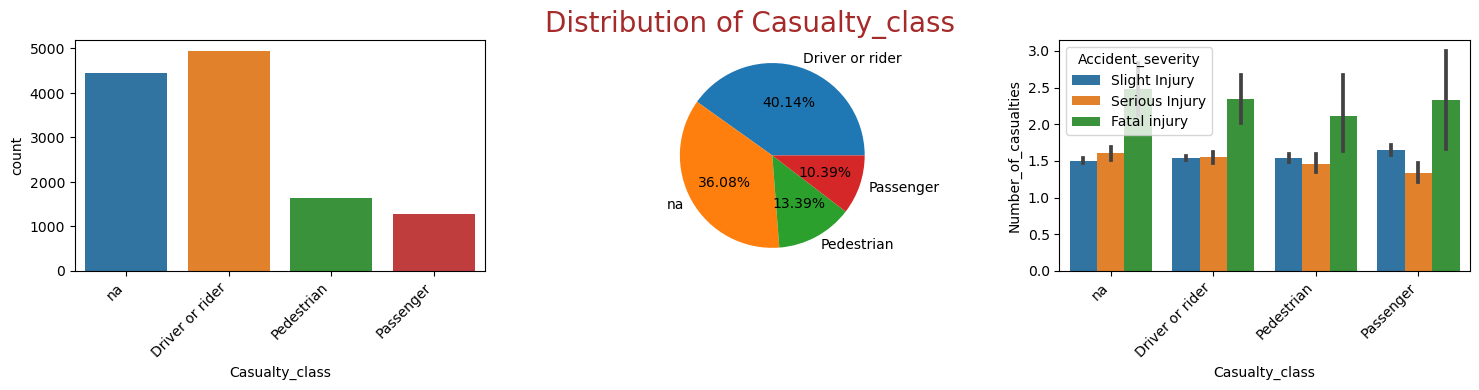

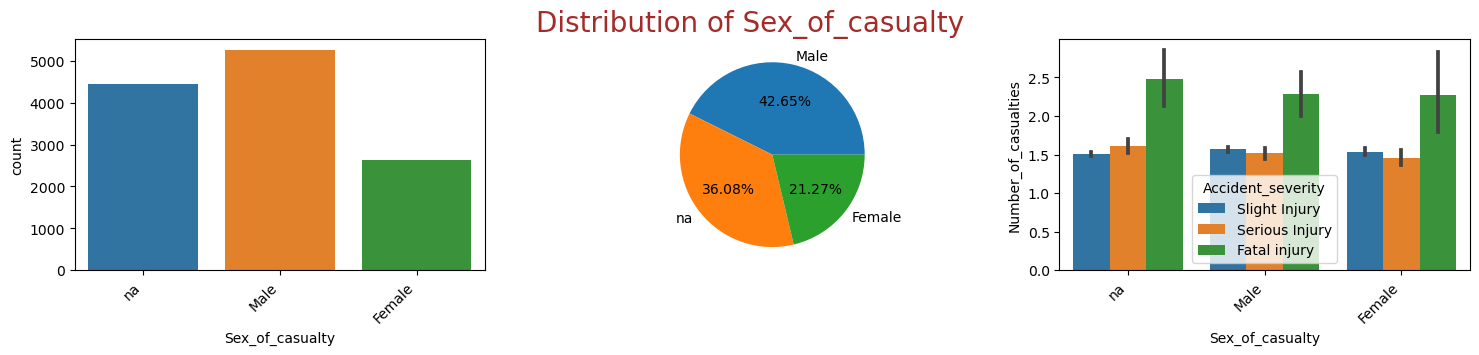

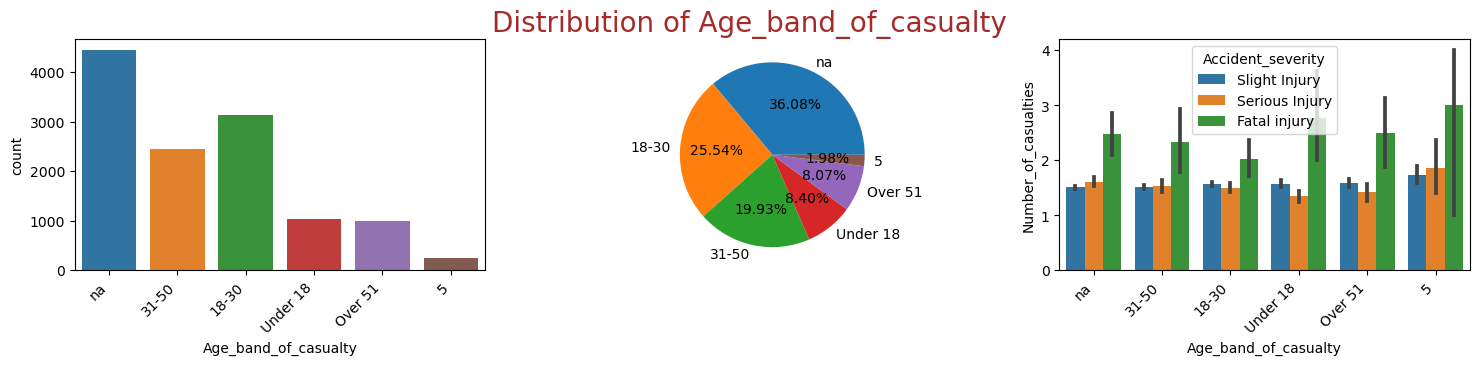

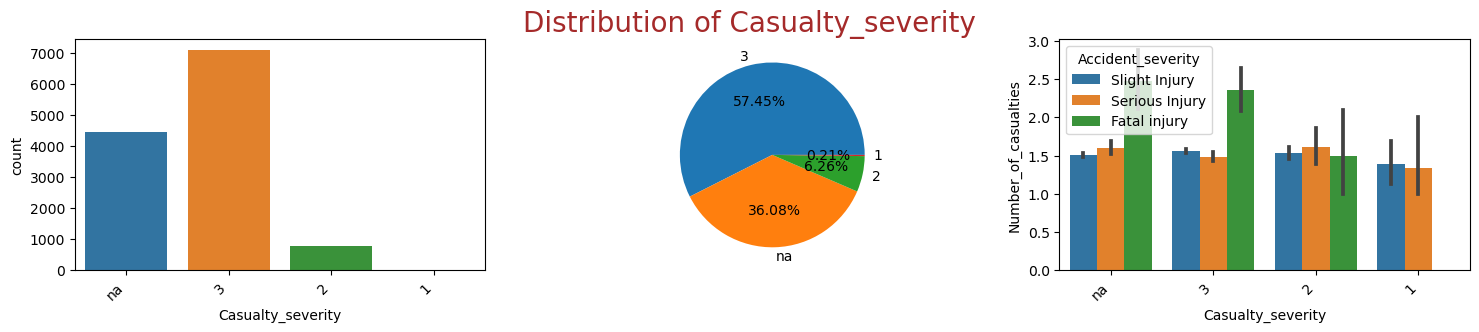

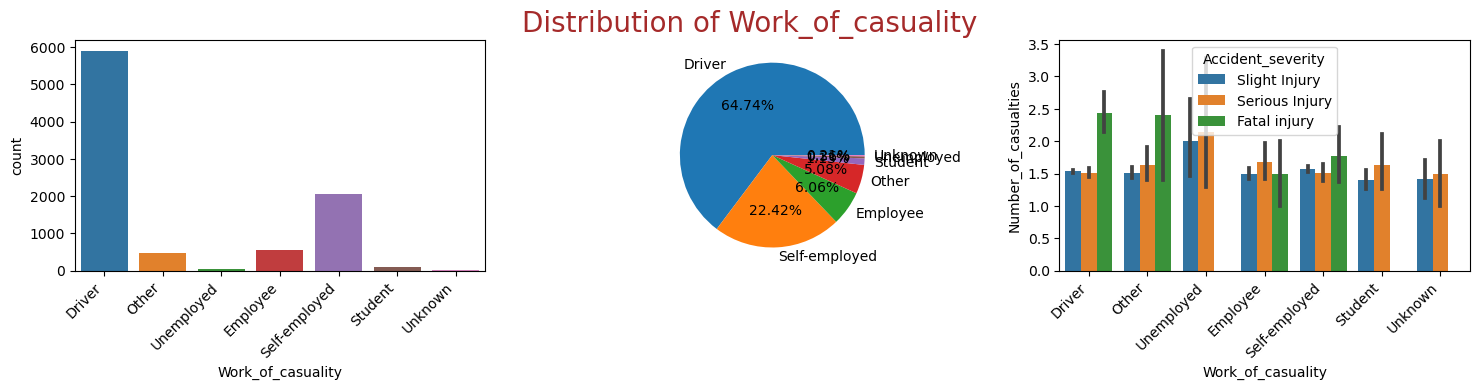

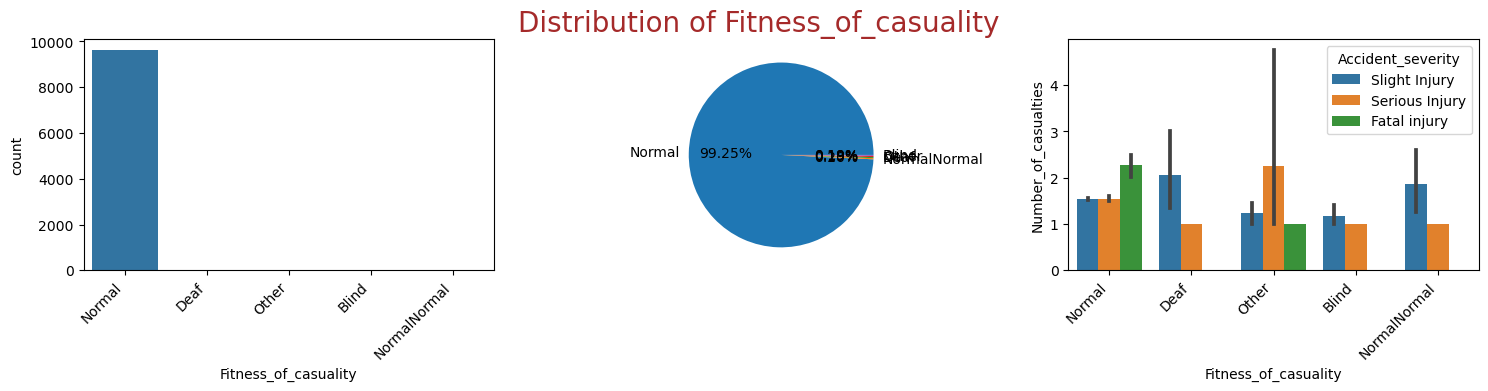

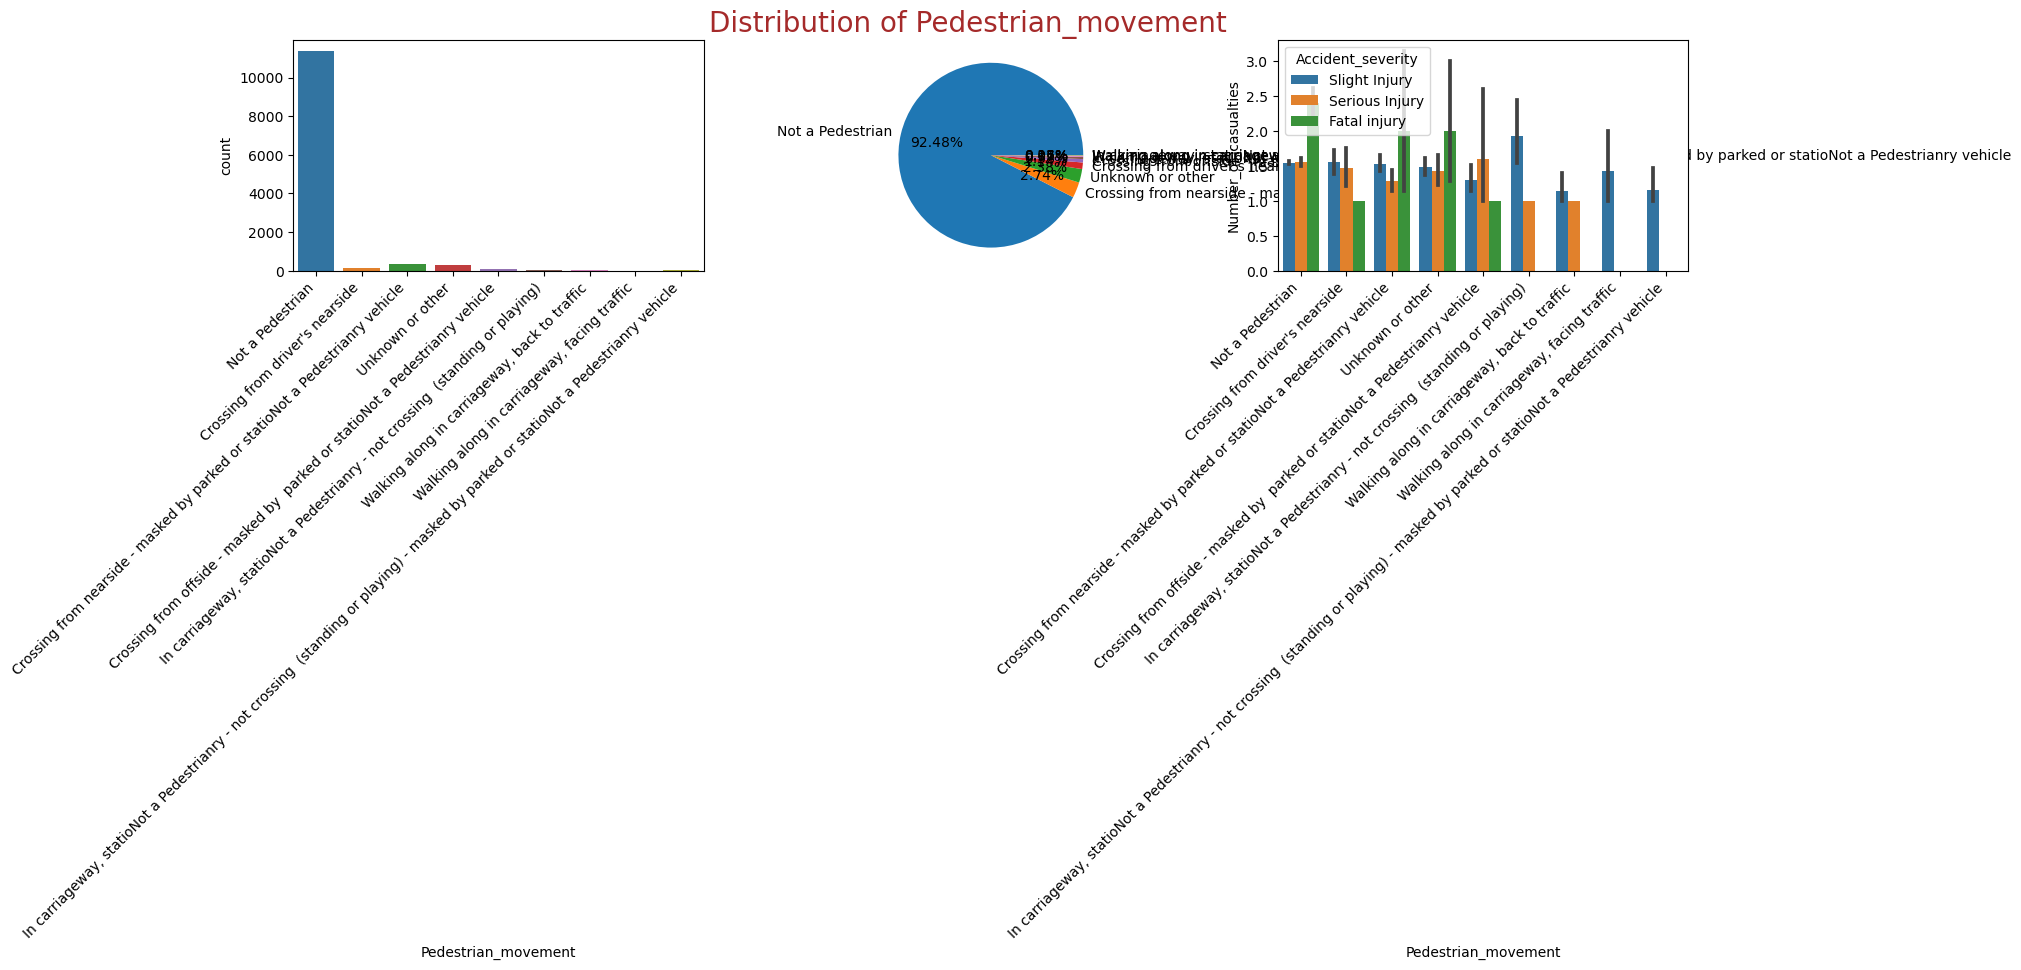

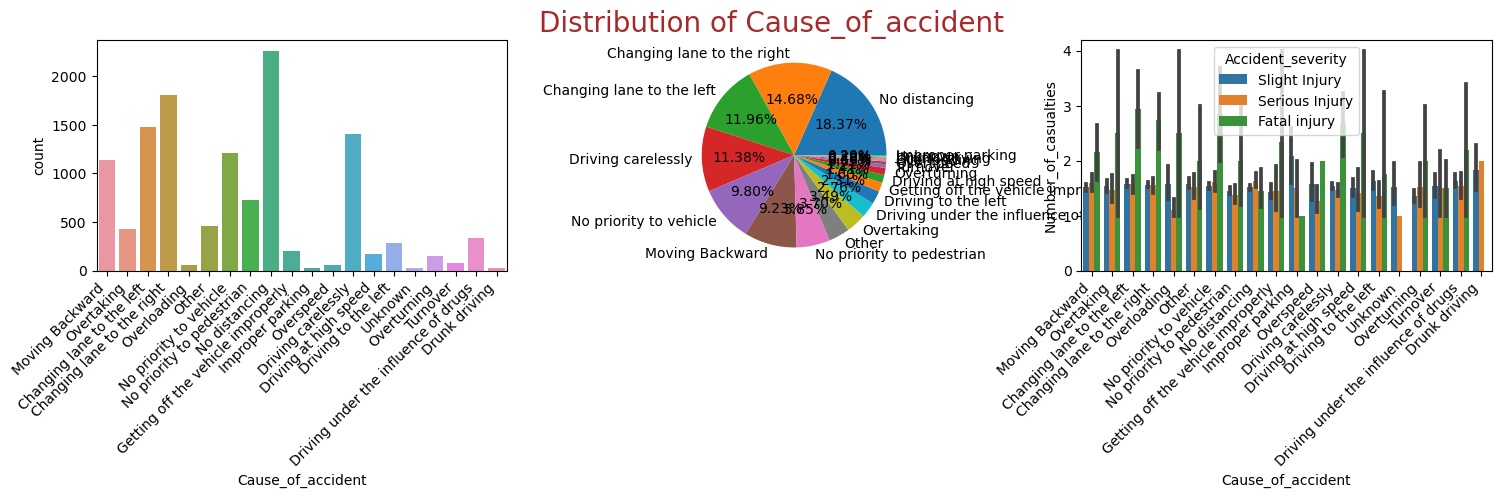

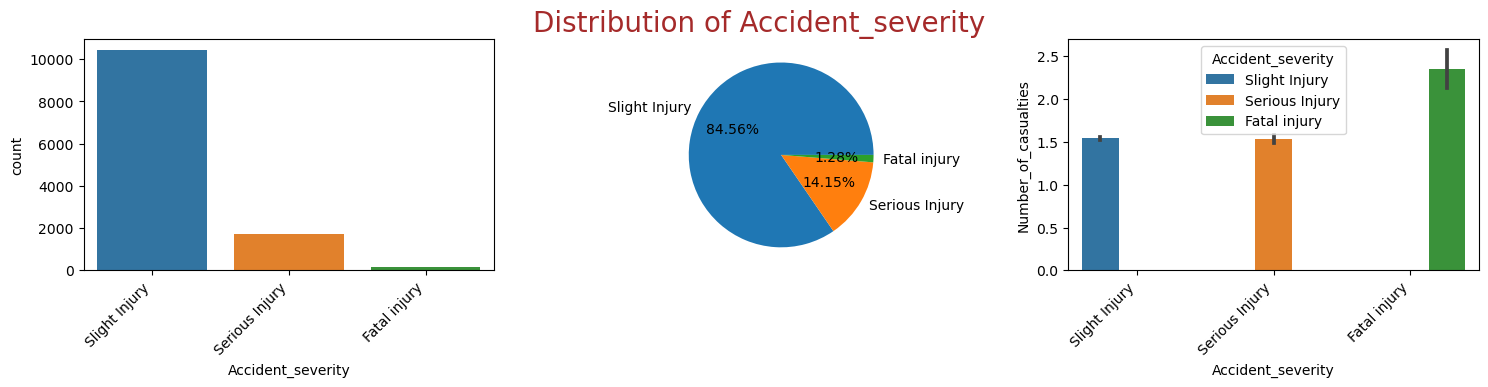

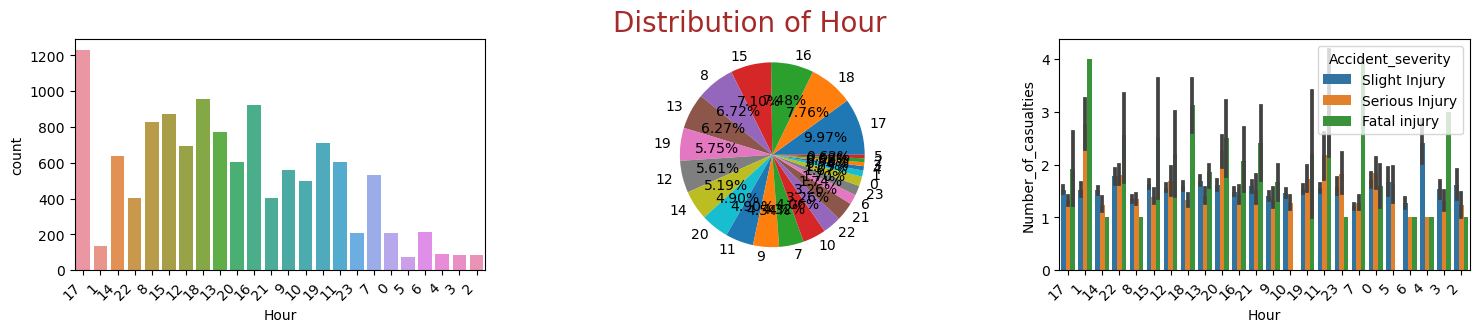

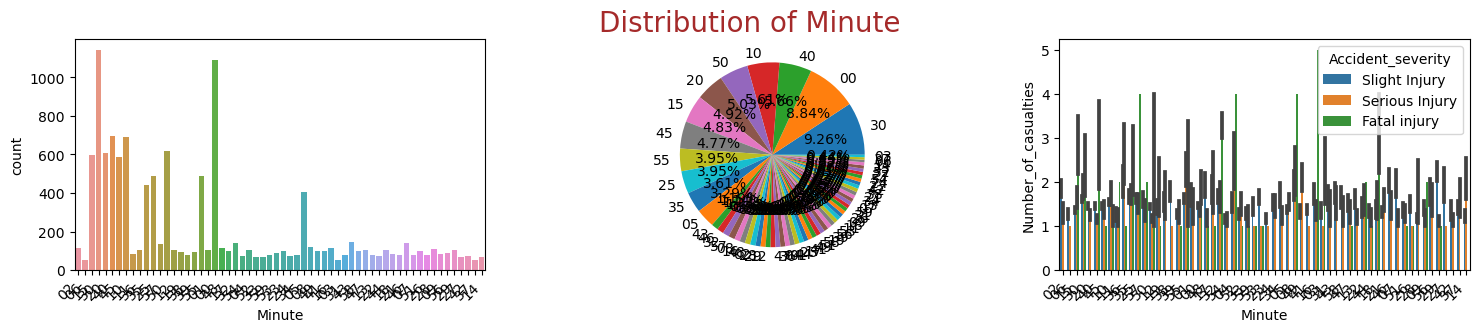

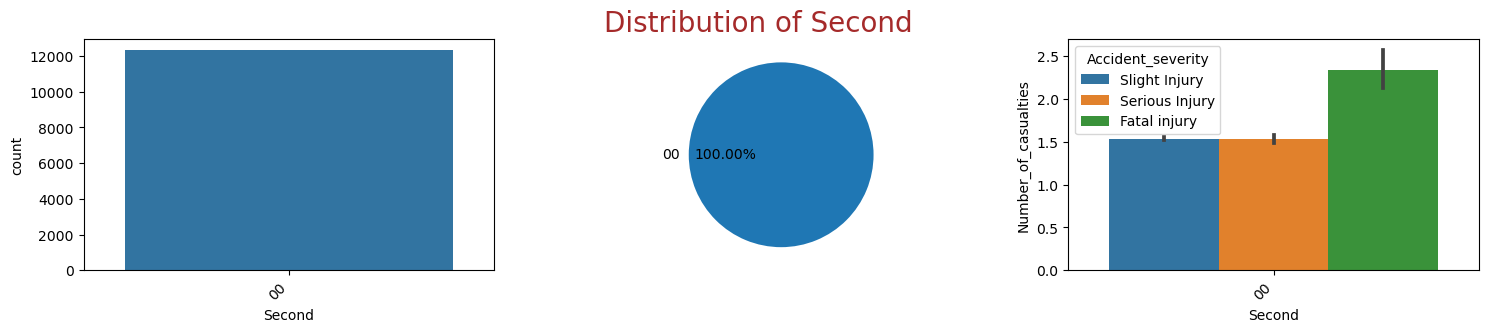

In [18]:
plt.rcParams["figure.figsize"] =(18,3)


for i in cols:
    plt.suptitle(f"Distribution of {i}",size=20, c="brown")
    plt.subplot(1,3,1)
    sns.countplot(data=df, x=df[i])
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,3,2)
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index,autopct="%0.2f%%")
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,3,3)
    sns.barplot(data=df, x=df[i], y="Number_of_casualties",hue="Accident_severity")
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f"{i}_distribution.jpg")
    plt.show()
    
    print()

In [19]:
df.Number_of_casualties.value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

In [20]:
df.Number_of_vehicles_involved.value_counts()

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

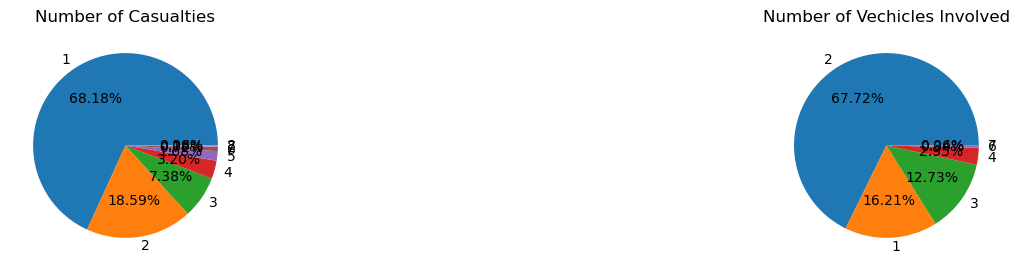

In [21]:
# plt.scatter(df.Number_of_casualties, df.Number_of_vehicles_involved)
plt.subplot(1,2,1)
plt.title("Number of Casualties")
plt.pie(df.Number_of_casualties.value_counts(),autopct="%0.2f%%", labels=df.Number_of_casualties.value_counts().index)

plt.subplot(1,2,2)
plt.title("Number of Vechicles Involved")
plt.pie(df.Number_of_vehicles_involved.value_counts(),autopct="%0.2f%%", labels=df.Number_of_vehicles_involved.value_counts().index)

plt.show()

In [22]:
df.Second

0        00
1        00
2        00
3        00
4        00
         ..
12311    00
12312    00
12313    00
12314    00
12315    00
Name: Second, Length: 12316, dtype: object

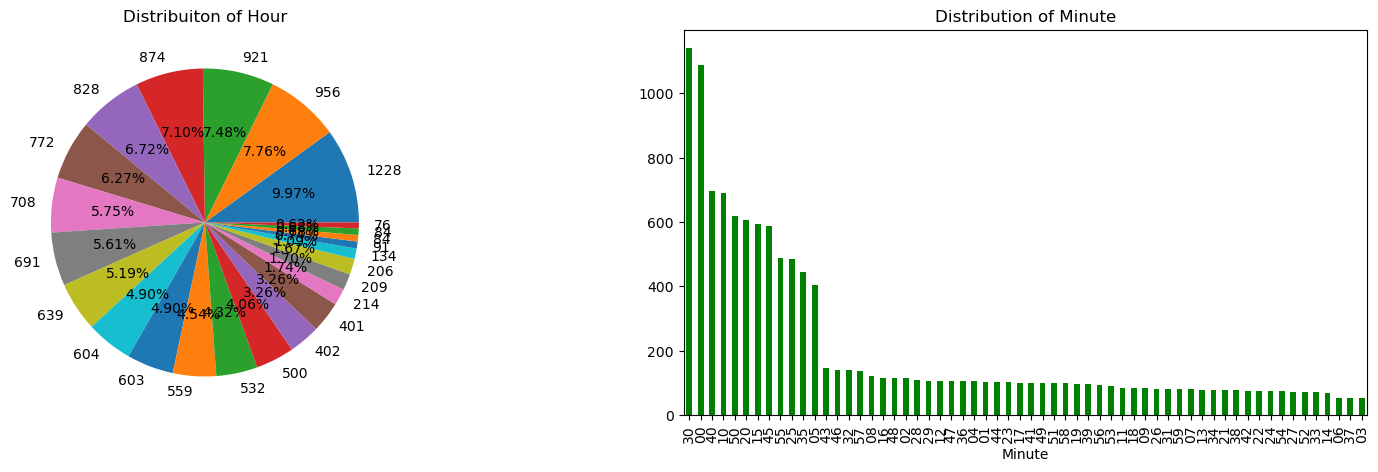

In [23]:
plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
plt.title("Distribuiton of Hour")
plt.pie(df.Hour.value_counts().sort_values(ascending=False), autopct="%0.2f%%", labels=df.Hour.value_counts())

plt.subplot(1,3,2)
plt.title("Distribution of Minute")
df.Minute.value_counts().plot.bar(color="g")

plt.show()

C:\Users\SHIV-G\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


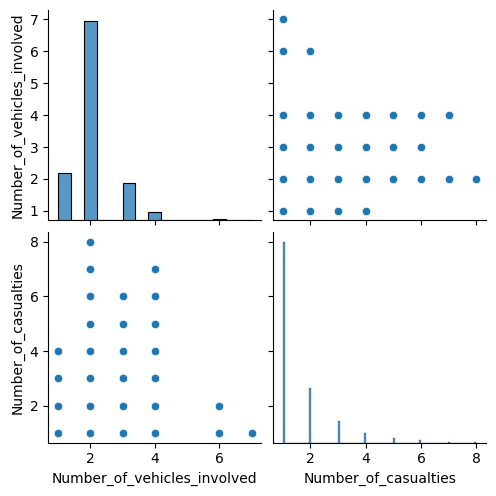

In [24]:
# pairplot of dataframe
sns.pairplot(df)
plt.show()

## 4 Report/Conclusion

- The dataset contain entries of **23 hours data of 14-Oct-2023** and **most accident occurs time between 09:00 AM to 10:00PM O'clock**
- Most casualties occurs on **friday, thursday** and **wednesday** but **friday casualties are more than other days (16.50%)**. These **3 days have 46.5% of accidents. More Fatal injuries are also occur on Saturday, Sunday and Friday**.


- Age **18-30** and **31-50** are **more involved in high severity accident**. Which is **67.86% of the dataset**.

- **Male driver have heivy involvement in accidents (93%) only 5% are females.** In all categories, Serious Injury, Slight Injury and Fatal Injury males are more involvement than females.

- Education level of **Junior High school**, **Elementry High school** and **High School** drivers are involved in casualties. Accident Severity are more in case of **Junior High School, Elementry School** and **High School** drivers **65.82% , 18.69%** and **9.59%** respectively. **Junior High School education level drivers have high fatality rate.**



- **82% drivers are realted to employee of any company** which is **approx 10000**. Owner realted drivers are very less. **Number of casuality occurs in owners related drivers than employees**. Fatality rate of owner related drivers is very high.



- **Most drivers have 2- 10+ years experience**. **73% drivers are experienced**. **Most fatality rate occurs through unexperienced driver (below 1year)** 


- **Automobile is the major reason for casualties.** after that **Lorry** have done lots of casualties alone **(19%)**. **Public transport (Seats > 12)** and **Special Vehical** are the main reason for casualties. Not any severity with bicycle.

- **88.38% vehical are own by the vehical owner**. Only **8.80%** vehicals own by the **government**. Casualties occurs by the *organisational vehicals are more than the others.


- **Most of the vehicals are 2-10+ years serviced.** **Below 1yr serviced vehical only 3.36%**. **Fatal injury have same pattern for all year serviced vechicals.** 

- **98.58% vehicals are not defected.**

- **31.62% accident occurs no recognition place(Others)**. **Office area** and **Residential area** are the most spotted point of accidents. **Rural village areas** and **Outside rural areas** have high **Serious injury** and **Fatal Injury**. **Rural village areas, Outside villages areas, Market Area, Office area** are the **main accident severity points**.    



- **Two Ways(divided with solid lines road marking) is very less which is only 2% of the total road**.  **Undivided Two way** and **Two way without proper road marking** are more. Means good roads are very less. **Two way (proper), One Way** and **Undivided two way** are the main reason of accident severity.

- Most of the road include **Tangent road with flat terrain**. **Escarpments, Tangent road with rolling terrain** and **Tangent road with flat terrain** have seviour accident occurs.

- **Y junction is more than other junctions**. which is **33.5%**. More Fatal injury occurs at **O-Shape junction** and it also with **Crossing** and **No Junction**.

- **93% roads are asphatt road**. Most casualties occurs on **Asphatt road with some distrss** places.

- **Road surface is dry most(76%).** but **most accident severity occurs on wet or damp road**.

- There are **Darkness** and **Daylight Light condition of road during more casualities**. But **more accident fatality injuries occurs on the darkness (no lighting)** 

- The dataset contains most of the **normal** weather condition. **Slight Injury** occcurs in almost every weather conditions, but **Raining**  and **Normal** weather condition are responsible for **Fatal Injuries**.

- **Vehicals to vehicals collision is more than other types of collision (72%)**. Which mean veh-to-veh is main reason of accidents. But **vehicals with roadside objects** collision have high accident severities than **vehicals with vehicals** collision. 

- **68%** accident occurs during when vehical **going straight**. **moving backward** and **others** are not the main reason of accidents. **Getting off** and **moving backward** is the main reason of **Fatal Injuries**.

- **Driver or rider** is the main casualties calss. but **na** class have also 36% of casualties occurs. **na** mean not defined class casualties. For example it can be anyone like riksha driver, with animals etc. **There are equal Fatality rate in all classes.** 

- **Males are more than females in casualties sex class.**

- **18-30 years** age group have high casualties but **5 year** and **Under 18** age years casualties more than others.

- **Casualties severities of 3 person are more than others.** Which is **57%** of dataset. **Casualties severites are more in 3 person involved accidents**.

- **Most of the driver (by profession) involved in casualties, but 22% of self-employeed (by profession) person also involved in it**. There was **very few employees (6%)** (by profession) involved in casualties. 

- **Fitness of casualties was normal**

- **Most of people are not a pedistiran**. **Very few people are pedistrians which is (7.50%)** of dataset. But more fatalities occurs on **Not a pedistrian** and **Crossing from nearside**.

- **No distancing, Changing lane to the right, Changing lane to the left** and **Drive Carelessly**. These are the 4 major factor for cause of accidents. **These factors have 56% reason of accident**. **Changing lane, Drive carelessly** and **No priority to vehica** major reason of accident severities.

- **Slight Injuries >> Serious injuries > fatal injuries**. Mean **Only 1.28% are the fatal injuries has occured**. Accident severities in **Most of the people have sligh injuries during road accidents (84.5%)**. 


- In **17 Hours** or **05:00PM o'clock have very high accident rate**. Which is apporx **10%** of the dataset. **Most severities accident occurs during midnight when darkness**.

- Every **30 and 60 minutes** have high accident rate. which is **9%**.

- **Number of casualties of 1 person have very high than people with 2 number of casualties (18.5%).**
- **Most accident occurs when 2 vehicals are involved**.

## Happy Learning